Project 1- Airbnb Analysis

In [6]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import pprint
import gmaps
from config import gkey

In [7]:
#Import csv file

df = pd.read_csv("Resources/listings.csv")
master_df = pd.DataFrame(df)
master_df = master_df.loc[df['number_of_reviews']>1]
master_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20180827015748,2018-08-27,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,2017-BFN-0002177,"{""Colorado State"","" the City and County of Den...",t,f,moderate,t,t,3,3.00
1,590,https://www.airbnb.com/rooms/590,20180827015748,2018-08-27,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,t,2018-BFN-O0O5791,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,4.71
2,592,https://www.airbnb.com/rooms/592,20180827015748,2018-08-27,private,Denver short-term-rental license number 2016-B...,This is a basement room. You can sometimes he...,Denver short-term-rental license number 2016-B...,none,NaN,...,t,2016-BFN-0008735,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,1.23
3,686,https://www.airbnb.com/rooms/686,20180827015748,2018-08-27,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,2016-BFN-0008368,"{""Colorado State"","" the City and County of Den...",t,f,moderate,f,f,3,1.91
4,1940,https://www.airbnb.com/rooms/1940,20180827015748,2018-08-27,Baker Studio Close to EVERYTHING,Significant discounts for week or month+ reser...,The studio is highly functional and cozy. It ...,Significant discounts for week or month+ reser...,none,Baker is a historic neighborhood with quaint V...,...,t,344114-070056 2018-BFN-0002596,"{""Colorado State"","" the City and County of Den...",f,f,strict_14_with_grace_period,f,f,1,1.08


In [8]:
#see lits of column headers
master_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
#set locations
locations = master_df[['latitude', 'longitude']]

In [10]:
#plot heatmap
gmaps.configure(api_key=gkey)
fig = gmaps.figure()

#create heatlayer
heat_layer = gmaps.heatmap_layer(locations)

#add heatlayer to fig
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
##bar chart of count of properties in each neighborhood
#grab needed columns
neighborhood_count = master_df[['id', 'neighbourhood_cleansed']]

#count groupby neighborhood
grouped_neighborhood = neighborhood_count.groupby(['neighbourhood_cleansed']).count()

grouped_neighborhood.head()

,id
neighbourhood_cleansed,
Athmar Park,28
Auraria,1
Baker,117
Barnum,25
Barnum West,21


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77],
 <a list of 78 Text xticklabel objects>)

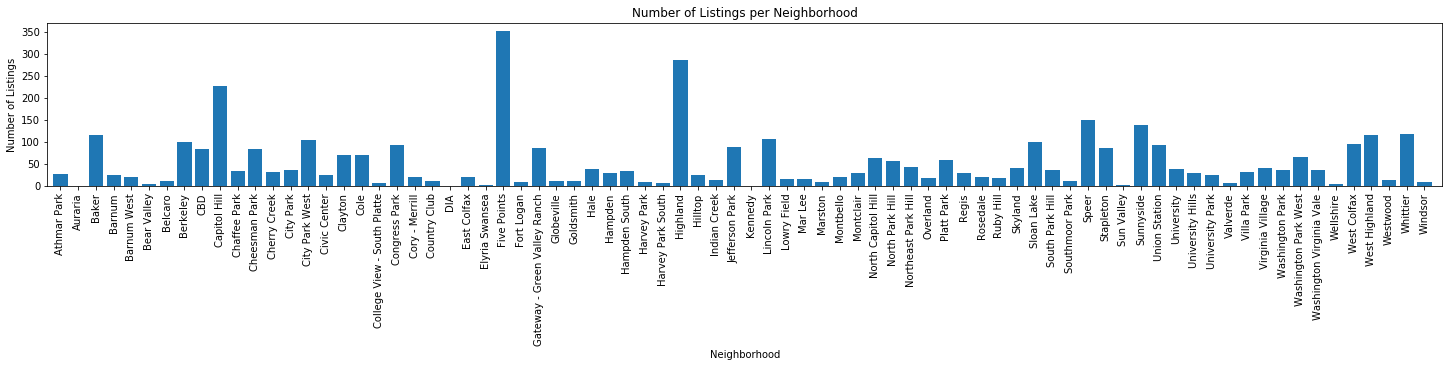

In [18]:
#reset index
neighborhood = grouped_neighborhood.reset_index()

#create bar chart
plt.figure(figsize=(25,3))
plt.bar(neighborhood['neighbourhood_cleansed'], neighborhood['id'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Neighborhood')
plt.xlim(-0.75, len(neighborhood['neighbourhood_cleansed']))
plt.xticks(rotation=90)